In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 数据导入

In [ ]:
train_data = pd.read_csv('/home/aistudio/data/data43907/train_local.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
1,2,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
2,3,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
3,4,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
4,5,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


### 训练集特征说明
- PassengerID (ID)
- Survived (是否存活)
- Pclass (客舱等级，重要)
- Name (姓名，可结合爬虫)
- Sex (性别，重要)
- Age (年龄，重要)
- SibSp (旁系亲友)
- Parch (直系亲属)
- Ticket (票编号)
- Fare (票价)
- Cabin (客舱编号)
- Embarked (上船港口编号)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 12 columns):
PassengerId    623 non-null int64
Survived       623 non-null int64
Pclass         623 non-null int64
Name           623 non-null object
Sex            623 non-null object
Age            499 non-null float64
SibSp          623 non-null int64
Parch          623 non-null int64
Ticket         623 non-null object
Fare           623 non-null float64
Cabin          139 non-null object
Embarked       620 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 58.5+ KB


可以看到 Age 和 Cabin 和 Embarked都存在空值

In [ ]:
test_data = pd.read_csv('/home/aistudio/data/data43907/test_local.csv')
test_data.head()

In [ ]:
test_data.info()

## 数据初步分析

In [ ]:
train_data['Survived'].value_counts()

0    392
1    231
Name: Survived, dtype: int64

1. 性别与存活率的关系

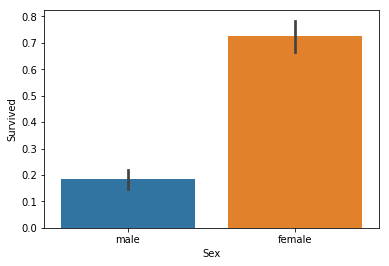

In [ ]:
sns.barplot(x = 'Sex' , y = 'Survived',data = train_data)

2.客舱等级和存活率关系

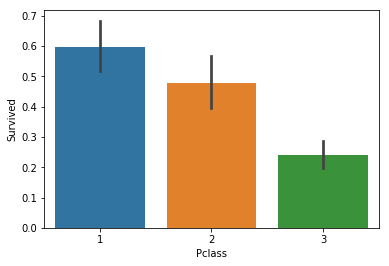

In [ ]:
sns.barplot(x = 'Pclass' , y = 'Survived' , data = train_data)

3. 旁系亲属数量和存活率的关系

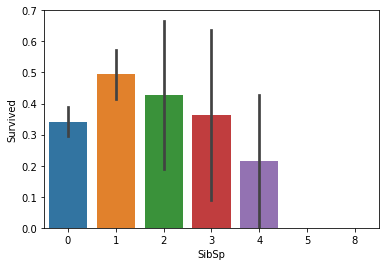

In [ ]:
sns.barplot(x = 'SibSp' , y = 'Survived' , data = train_data)

4.直系亲属数量和存活率的关系

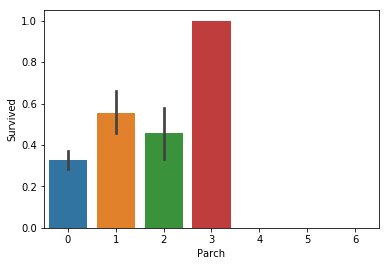

In [ ]:
sns.barplot(x = 'Parch' , y = 'Survived' , data = train_data)

5.从不同的生还情况的密度图看，15岁附近的生还率有明显区别

Text(12.3598,0.5,'density')

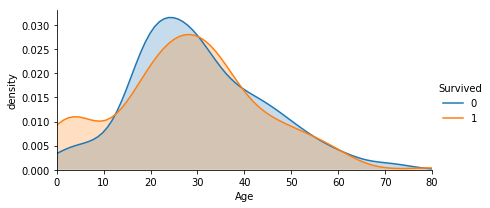

In [ ]:
facet = sns.FacetGrid(train_data , hue = 'Survived' , aspect= 2 )
facet.map(sns.kdeplot , 'Age',shade = True)
#kdeplot核密度估计
facet.set(xlim = (0,train_data['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')


6.上船港口和存活率的关系

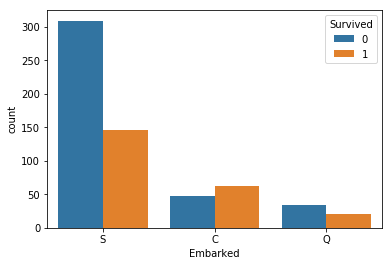

In [ ]:
sns.countplot('Embarked' , hue = 'Survived' , data = train_data)

## 数据清洗

1. 缺失值清洗         
Age缺失值采用平均值来填充缺失值，也可以采用回归方法确定缺失值

In [ ]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

embarked 缺失值，使用出现频率最高的值来填充

In [ ]:
print(train_data['Embarked'].value_counts())
print(test_data['Embarked'].value_counts())

S    455
C    110
Q     55
Name: Embarked, dtype: int64
S    187
C     58
Q     22
Name: Embarked, dtype: int64


In [ ]:
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 12 columns):
PassengerId    623 non-null int64
Survived       623 non-null int64
Pclass         623 non-null int64
Name           623 non-null object
Sex            623 non-null object
Age            623 non-null float64
SibSp          623 non-null int64
Parch          623 non-null int64
Ticket         623 non-null object
Fare           623 non-null float64
Cabin          139 non-null object
Embarked       623 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 58.5+ KB


2.异常值处理       


## 特征转换

In [ ]:
features = ["Pclass", "Sex", 'Age','Embarked', "Parch"]
X = pd.get_dummies(train_data[features])
y = train_data["Survived"]
X_test = pd.get_dummies(test_data[features])

In [ ]:
X.head()

,Pclass,Age,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,4.000000,2,0,1,0,0,1
1,3,29.256353,0,0,1,0,0,1
2,3,1.000000,1,1,0,0,0,1
3,2,36.000000,2,0,1,0,0,1
4,2,43.000000,1,0,1,0,0,1


## 分类

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

训练模型

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X,y)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

生成提交结果文件

In [ ]:
predictions = rfc.predict(X_test)
submission = pd.DataFrame({'PassengerID' : test_data.PassengerId , 'Survived': predictions.astype(np.int32)})
submission.to_csv(r'work/rfc_submission.csv',index = False)

使用交叉验证在训练集上进行分类器及其参数进行评估

In [ ]:
cross_val_score(rfc,X,y,cv=5).mean()

0.7561081413210445

使用网格搜索方法寻找分类器最优参数组合

In [ ]:
rfc_best=RandomForestClassifier()
params = {'n_estimators':list(range(50,300,50)),'max_depth':list(range(2,10,2))}
gsearch = GridSearchCV(rfc_best,params,n_jobs=-1,cv = 5)
gsearch.fit(X,y)
print(gsearch.best_params_,gsearch.best_score_)

{'max_depth': 4, 'n_estimators': 100} 0.8138041733547352


使用优化参数后的模型生成提交结果文件

	神经网络

In [ ]:
mlp = MLPClassifier(solver='lbfgs', max_iter=100, random_state=20)
params = {'hidden_layer_sizes':list(range(1,100,10)), 'solver':['lbfgs','sgd','adam']}
best_mlp = GridSearchCV(mlp,params,n_jobs=-1,cv = 5)
best_mlp.fit(X,y)
print(best_mlp.best_params_,best_mlp.best_score_)